# Using Ion Velocity Meter data from NASA Ionospheric Connections Explorer

In [1]:
# Import packages
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="'S' is deprecated and will be removed in a future version, please use 's' instead.")

In [2]:
import pysat

In [3]:
# Set data directory if user hasn't already set one
print(f"old: {pysat.params['data_dirs']}")
if len(pysat.params['data_dirs']) == 0 or pysat.params['data_dirs'] == ['.']:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = '/home/jovyan/scratch_space/.pysat/'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

print(f"new: {pysat.params['data_dirs']}")

old: ['/home/jovyan/scratch_space/.pysat']
pysat directory has been set previously. Leaving unchanged.
new: ['/home/jovyan/scratch_space/.pysat']


In [4]:
# Register instruments with pysat. Only needed once per install.
import pysatNASA
pysat.utils.registry.register(['pysatNASA.instruments.icon_ivm'])

# Improvements for loading ICON metadata are currently in
# https://github.com/pysat/pysatNASA/pull/100.
warnings.simplefilter('ignore', UserWarning)

In [5]:
# Instantiate IVM Instrument object. IVM data is automatically cleaned using
# instrument flags as it is loaded. Levels of 'clean', 'dusty', 'dirty', and
# 'none' or None are supported. This is generally true for all pysat instruments
ivm = pysat.Instrument('icon', 'ivm', inst_id='a', clean_level='clean')

In [6]:
# Learn about ICON IVM.
help(ivm.inst_module)

Help on module pysatNASA.instruments.icon_ivm in pysatNASA.instruments:

NAME
    pysatNASA.instruments.icon_ivm - Module for the ICON IVM instrument.

DESCRIPTION
    Supports the Ion Velocity Meter (IVM) onboard the Ionospheric Connections
    (ICON) Explorer.
    
    Properties
    ----------
    platform
        'icon'
    name
        'ivm'
    tag
        None supported
    inst_id
        'a' or 'b'
    
    Example
    -------
    ::
    
        import pysat
        ivm = pysat.Instrument(platform='icon', name='ivm', inst_id='a')
        ivm.download(dt.datetime(2020, 1, 1), dt.datetime(2020, 1, 31))
        ivm.load(2020, 1)
    
    By default, pysat removes the ICON level tags from variable names, ie,
    ICON_L27_Ion_Density becomes Ion_Density.  To retain the original names, use
    ::
    
        ivm = pysat.Instrument(platform='icon', name='ivm', inst_id='a',
                               keep_original_names=True)
    
    Author
    ------
    R. A. Stoneback

FUNCT

In [7]:
# Set range of dates for downloading ICON data
start_download_date = dt.datetime(2020, 1, 1)
stop_download_date = dt.datetime(2020, 1, 4)

In [11]:
# Download data from NASA CDAWeb.

# If you would like additional feedback while pysat performs operations
# uncomment the line below.
# pysat.logger.setLevel("INFO")

# Download data between specific dates. We shouldn't need to do this today
#ivm.download(start_download_date, stop_download_date)

# To get all of the latest files on the server but not on
# the local machine, uncomment line below.
# The version and revision numbers in the filenames are used to identify
# the latest files. This works for all ICON instruments.
# ivm.download_updated_files()

# Resume limited feedback
# pysat.logger.setLevel("WARNING")

## IVM Basic Density Plot

Text(0, 0.5, 'Log Ion Density (N/cc)')

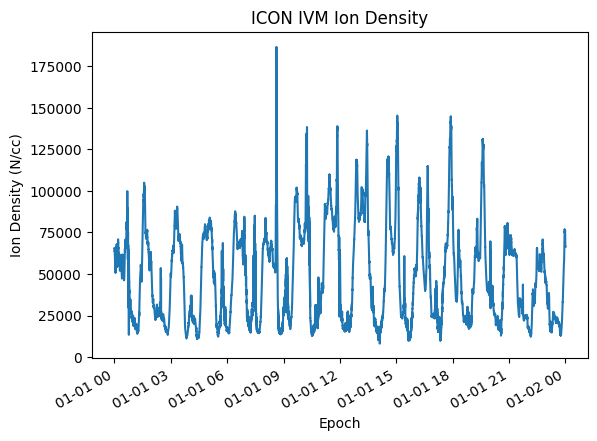

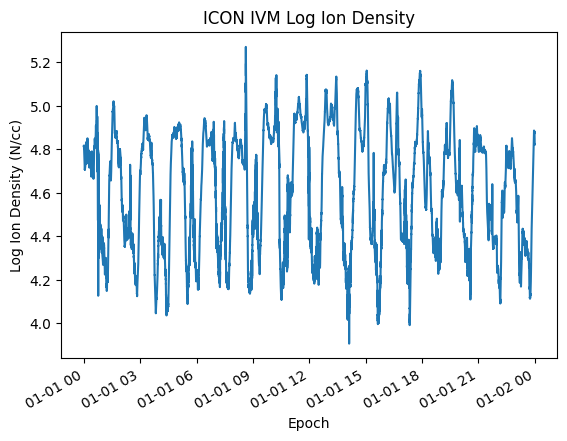

In [12]:
# Make basic time series plot of Ion Density
ivm = pysat.Instrument('icon', 'ivm', inst_id='a')

# Load day of data
ivm.load(2020, 1)

# Basic plot of ion density
ivm['Ion_Density'].plot()
plt.title('ICON IVM Ion Density')
plt.ylabel('Ion Density (N/cc)')

# Basic plot of the log of ion density
plt.figure()
np.log10(ivm['Ion_Density']).plot()
plt.title('ICON IVM Log Ion Density')
plt.ylabel('Log Ion Density (N/cc)')

## IVM Per-Orbit Density Plots

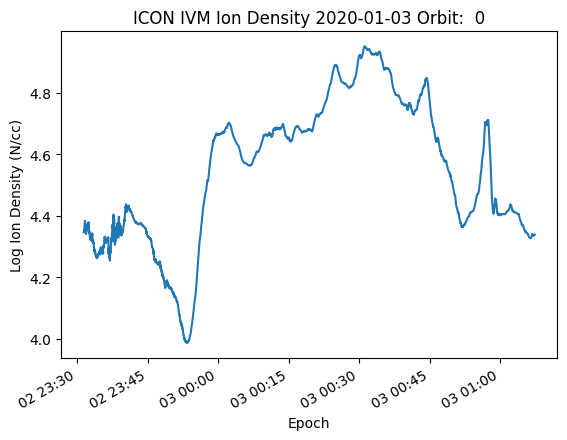

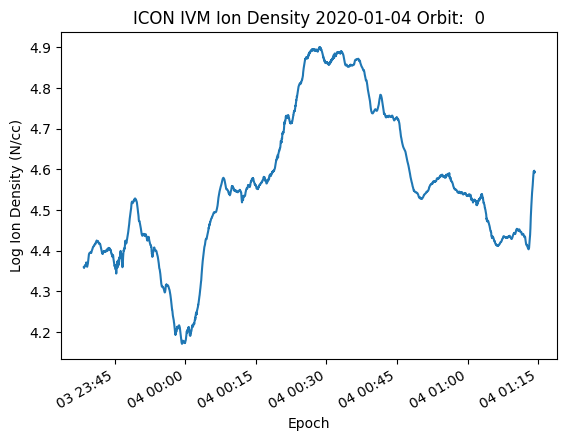

In [13]:
# Produce ion density plots orbit-by-orbit.
# While ICON products include an orbit number based upon the position of the
# spacecraft this breakdown does not produce a geophysical organization
# of the data.

# We demonstrate using pysat to parse the data orbit-by-orbit using Magnetic
# Local Time (MLT) values in the file to make orbits between 0-24 MLT.

# Set date for plotting IVM data
date = dt.datetime(2020, 1, 3)

# pysat is able to calculate orbit breaks in real-time.
# Setup parameters for pysat to use when determining orbits
orbit_info = {'kind': 'lt', 'index':'Magnetic_Local_Time'}
# 'kind' sets the type of orbit breakdown, lt for local time.
# 'index' sets the variable that will be used for determining orbit breaks.
# The expected period may also be set, defaults to a 97 minute LEO period.

# Instantiate ICON IVM Instrument object with orbit information
ivm = pysat.Instrument('icon', 'ivm', inst_id='a', clean_level='clean', 
                       orbit_info=orbit_info)

# Set the start and stop dates when iterating over Instrument object.
# By default, pysat will iterate over all available data.
# Two days chosen here to demonstrate orbits cross file and day boundaries.
ivm.bounds = (None, date + dt.timedelta(days=1))

ivm.load(date=date)
# Iterate over the IVM data orbit-by-orbit. Each loop, a single orbit of
# data is available in ivm.data.
for livm in ivm.orbits:
    if livm.orbits.current == 0:
        # Only plot the first orbit of each day.
        plt.figure()
        np.log10(livm['Ion_Density']).plot()
        title = ''.join(['ICON IVM Ion Density {date:s} Orbit: {num:2d}',
                         '']).format(date=livm.date.strftime('%Y-%m-%d'),
                                     num=livm.orbits.current)
        plt.ylabel('Log Ion Density (N/cc)')
        plt.title(title)


## Summary Plot - Per Orbit Data Breakdown

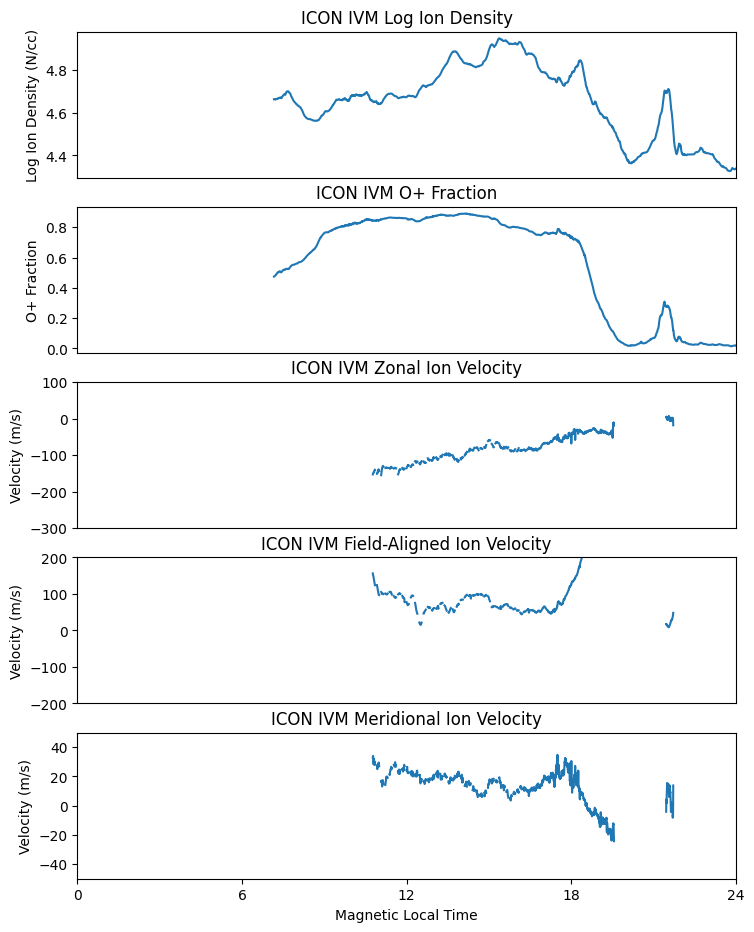

In [14]:
# Summary plot orbit-by-orbit, single figure.

# Set date for plotting IVM data
date = dt.datetime(2020, 1, 3)

# pysat is able to caculate orbit breaks in real-time.
# Setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index':'Magnetic_Local_Time'}
# 'kind' sets the type of orbit breakdown, lt for local time.
# 'index' sets the variable that will be used for determining orbit breaks.

# Instantiate ICON IVM Instrument object
ivm = pysat.Instrument('icon', 'ivm', inst_id='a', clean_level='clean', 
                       orbit_info=orbit_info)

# Set the start and stop dates when iterating over Instrument object.
# By default, will iterate over all available data.
ivm.bounds = (date, date)

# Create custom method to add Log Ion Density to Instrument object.
def add_log_density(inst):
    """Add the log of ion density to `inst`.
    
    Parameters
    ----------
    inst : pysat.Instrument
        ICON IVM pysat.Instrument object.
    """
    inst['Log_Ion_Density'] = np.log10(inst['Ion_Density'])

    # Define and assign metadata
    meta = {inst.meta.labels.units: 'Log(N/cc)',
            inst.meta.labels.name: 'Log Ion Density',
            inst.meta.labels.desc: 'Log base 10 of ambient ion density.',
            inst.meta.labels.min_val: -np.inf,
            inst.meta.labels.max_val: 7.,
            inst.meta.labels.fill_val: np.nan}
    inst.meta['Log_Ion_Density'] = meta

    return

# Attach custom function to Instrument object.
# This method is applied automatically to the IVM data every time new data is
# loaded. This feature allows a developer to customize the data in an Instrument
# object even when processed by third-party analysis modules.
ivm.custom_attach(add_log_density)

# Create a figure so each orbit is on the same plot.
fig, axs = plt.subplots(5, 1, figsize=(8.5,11))

# Use pysat functionality to iterate over the data, orbit by orbit.
# Each loop, a single orbit of data available in `ivm.data`.
for livm in ivm.orbits:
    # Log density plot.
    livm.data.plot(x='Magnetic_Local_Time', y='Log_Ion_Density',
                   xlim=(0,24), xticks=[],
                   ax=axs[0], legend=False)
    axs[0].set_title('ICON IVM Log Ion Density')
    axs[0].set_ylabel('Log Ion Density (N/cc)')
    axs[0].set_xlabel('')
    
    # O+ fraction plot.
    livm.data.plot(x='Magnetic_Local_Time', y='Fractional_Ion_Density_O',
                   xlim=(0,24), xticks=[],
                   ax=axs[1], legend=False)
    axs[1].set_title('ICON IVM O+ Fraction')
    axs[1].set_ylabel('O+ Fraction')
    axs[1].set_xlabel('')

    # Zonal Ion Velocity plot.
    livm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Zonal',
                   xlim=(0,24), xticks=[],
                   ylim=(-300, 100),
                   ax=axs[2], legend=False)
    axs[2].set_title('ICON IVM Zonal Ion Velocity')
    axs[2].set_ylabel('Velocity (m/s)')
    axs[2].set_xlabel('')

    # Field-Aligned Velocity plot.
    livm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Field_Aligned',
                   xlim=(0,24), xticks=[],
                   ylim=(-200, 200),
                   ax=axs[3], legend=False)
    axs[3].set_title('ICON IVM Field-Aligned Ion Velocity')
    axs[3].set_ylabel('Velocity (m/s)')
    axs[3].set_xlabel('')

    # Meridional Ion Velocity plot.
    livm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Meridional',
                   xlim=(0,24), xticks=(0,6,12,18,24),
                   ylim=(-50, 50),
                   ax=axs[4], legend=False)
    axs[4].set_title('ICON IVM Meridional Ion Velocity')
    axs[4].set_ylabel('Velocity (m/s)')
    axs[4].set_xlabel('Magnetic Local Time')

    # For simplicity, only plot one orbit.
    break